# Hotel Booking Analysis and finding accurate reasons for more cancellation in two hotels.

Importing Libraries

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [99]:
import warnings
warnings.filterwarnings('ignore')

Loading and reading dataset

In [100]:
df=pd.read_csv("hotel_bookings.csv")

In [101]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [102]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


Analyzing and cleaning dataset

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [104]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [105]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [106]:
df.drop(['agent','company'], axis=1, inplace=True)

In [107]:
df.dropna()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [108]:
df.isnull().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
days_in_waiting_list                0
customer_type                       0
adr                                 0
required_car

In [109]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [110]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

In [112]:
df['month']=df['reservation_status_date'].dt.month

In [113]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,month
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,7
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,7
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,7
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,7
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,7


In [114]:
resort_hotel= df[df['hotel']=='Resort Hotel']
resort_hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,month
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,7
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,7
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,7
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,7
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,7


In [115]:
city_hotel= df[df['hotel']=='City Hotel']
city_hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,month
40060,City Hotel,0,6,2015,July,27,1,0,2,1,...,0,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-03,7
40061,City Hotel,1,88,2015,July,27,1,0,4,2,...,0,No Deposit,0,Transient,76.5,0,1,Canceled,2015-07-01,7
40062,City Hotel,1,65,2015,July,27,1,0,4,1,...,0,No Deposit,0,Transient,68.0,0,1,Canceled,2015-04-30,4
40063,City Hotel,1,92,2015,July,27,1,2,4,2,...,0,No Deposit,0,Transient,76.5,0,2,Canceled,2015-06-23,6
40064,City Hotel,1,100,2015,July,27,2,0,2,2,...,0,No Deposit,0,Transient,76.5,0,1,Canceled,2015-04-02,4


In [116]:
canceled_data=df[df['is_canceled']==1]
canceled_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,month
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,0,No Deposit,0,Transient,82.0,0,1,Canceled,2015-05-06,5
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,0,No Deposit,0,Transient,105.5,0,0,Canceled,2015-04-22,4
10,Resort Hotel,1,23,2015,July,27,1,0,4,2,...,0,No Deposit,0,Transient,123.0,0,0,Canceled,2015-06-23,6
27,Resort Hotel,1,60,2015,July,27,1,2,5,2,...,0,No Deposit,0,Transient,107.0,0,2,Canceled,2015-05-11,5
32,Resort Hotel,1,96,2015,July,27,1,2,8,2,...,0,No Deposit,0,Transient,108.3,0,2,Canceled,2015-05-29,5


In [117]:
non_canceled_data=df[df['is_canceled']==0]
non_canceled_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,month
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,7
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,7
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,7
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,7
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,7


Visualization of data

In [118]:
data= resort_hotel['is_canceled'].value_counts(normalize=True)
data

is_canceled
0    0.722366
1    0.277634
Name: proportion, dtype: float64

<Axes: title={'center': 'Resort Hotel - Cancelled vs Non cancelled ratio'}, xlabel='is_canceled'>

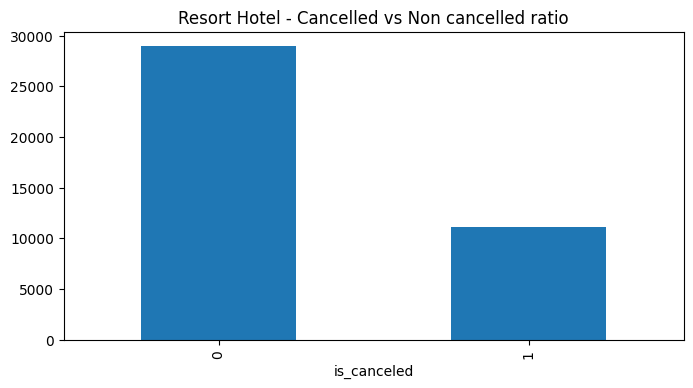

In [119]:
plt.figure(figsize=(8,4))
plt.title("Resort Hotel - Cancelled vs Non cancelled ratio")
resort_hotel['is_canceled'].value_counts().plot(kind='bar')

In [120]:
data= city_hotel['is_canceled'].value_counts(normalize=True)
data

is_canceled
0    0.58273
1    0.41727
Name: proportion, dtype: float64

<Axes: title={'center': 'City Hotel - Cancelled vs Non cancelled ratio'}, xlabel='is_canceled'>

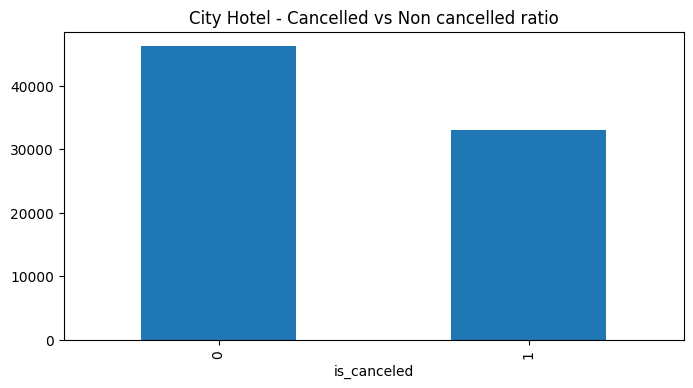

In [121]:
plt.figure(figsize=(8,4))
plt.title("City Hotel - Cancelled vs Non cancelled ratio")
city_hotel['is_canceled'].value_counts().plot(kind='bar')

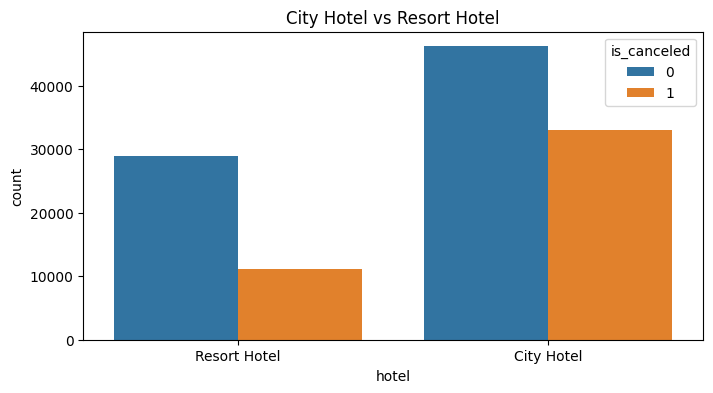

In [122]:
plt.figure(figsize=(8,4))
plt.title("City Hotel vs Resort Hotel")
axl=sns.countplot(x='hotel', hue='is_canceled', data=df)
plt.show();

In [123]:
data=canceled_data.groupby('month')[['is_canceled']].sum().reset_index()

In [124]:
data

,month,is_canceled
0,1,6061
1,2,4358
2,3,3820
3,4,3470
4,5,3138
5,6,2912
6,7,4369
7,8,2688
8,9,2676
9,10,4145


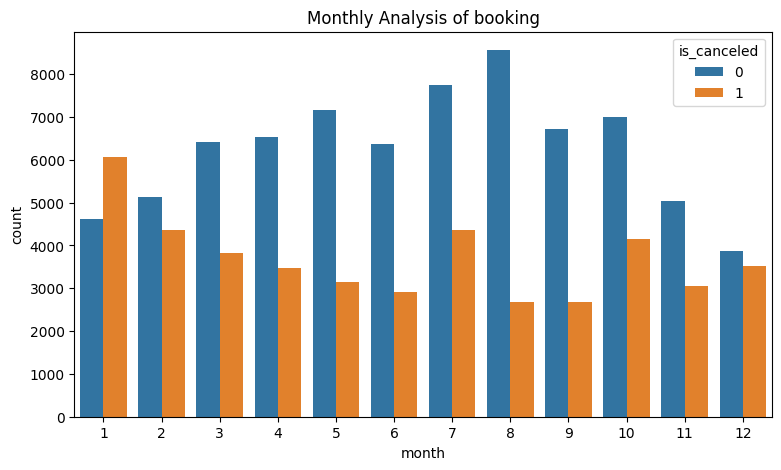

In [125]:
plt.figure(figsize=(9,5))
plt.title("Monthly Analysis of booking")
axl=sns.countplot(x='month', hue='is_canceled', data=df)
plt.show()

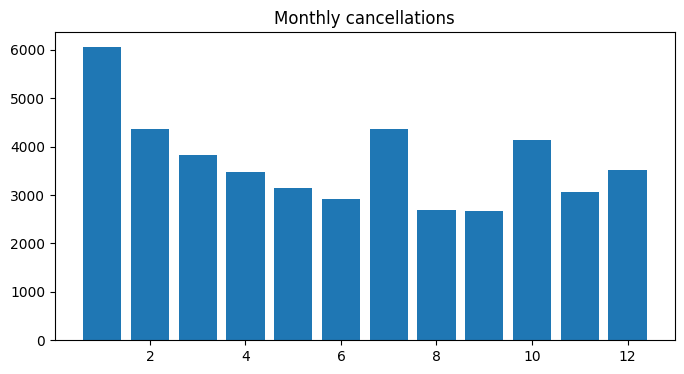

In [126]:
plt.figure(figsize=(8,4))
plt.title("Monthly cancellations")
plt.bar(data['month'], data['is_canceled'])
plt.show();

In [127]:
data=resort_hotel[resort_hotel['is_canceled']==1].groupby('month')[['is_canceled']].sum().reset_index()

In [128]:
data

,month,is_canceled
0,1,1334
1,2,1047
2,3,1156
3,4,973
4,5,865
5,6,1100
6,7,1068
7,8,773
8,9,603
9,10,781


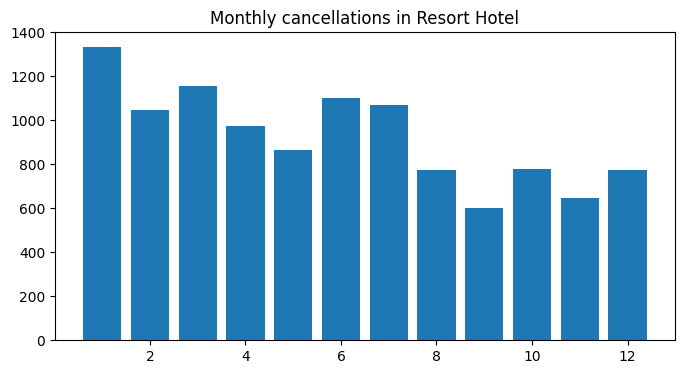

In [129]:
plt.figure(figsize=(8,4))
plt.title("Monthly cancellations in Resort Hotel")
plt.bar(data['month'], data['is_canceled'])
plt.show();

In [130]:
data=city_hotel[city_hotel['is_canceled']==1].groupby('month')[['is_canceled']].sum().reset_index()

In [131]:
data

,month,is_canceled
0,1,4727
1,2,3311
2,3,2664
3,4,2497
4,5,2273
5,6,1812
6,7,3301
7,8,1915
8,9,2073
9,10,3364


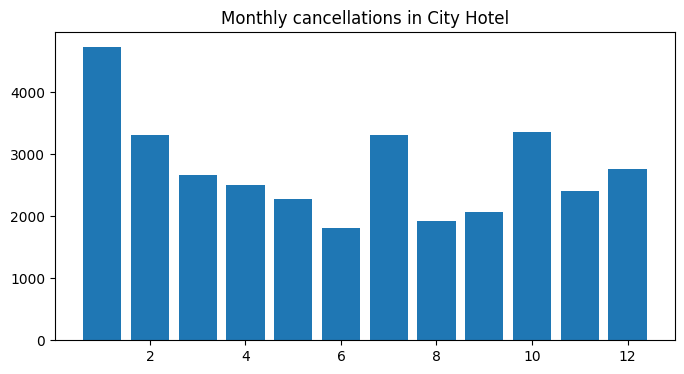

In [132]:
plt.figure(figsize=(8,4))
plt.title("Monthly cancellations in City Hotel")
plt.bar(data['month'], data['is_canceled'])
plt.show();

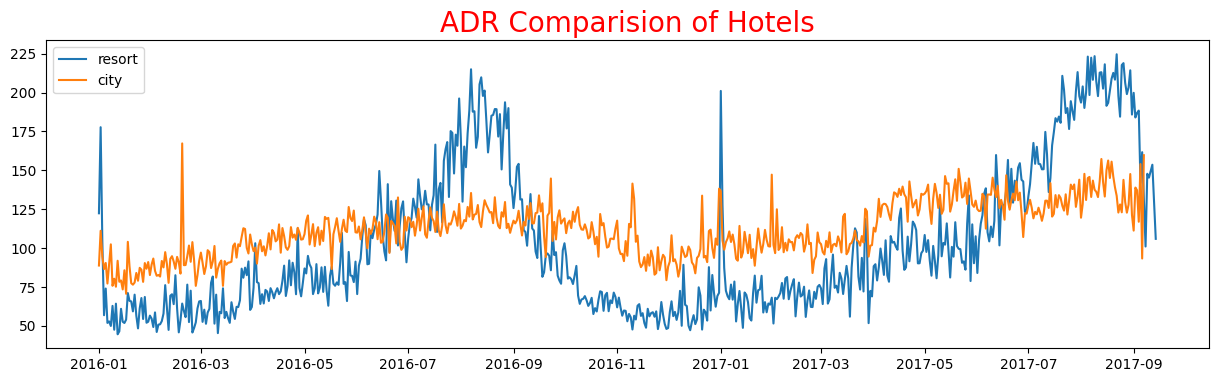

In [133]:
data1= resort_hotel[resort_hotel['reservation_status_date'].dt.year>2015].groupby('reservation_status_date')[['adr']].mean()
data2= city_hotel[city_hotel['reservation_status_date'].dt.year>2015].groupby('reservation_status_date')[['adr']].mean()

plt.figure(figsize=(15,4))

plt.title("ADR Comparision of Hotels", fontsize=20, color='red')

plt.plot(data1, label="resort")
plt.plot(data2, label="city")
plt.legend()
plt.show()

In [134]:
data=df[df['is_canceled']==1].groupby('month')[['adr']].sum().reset_index()
data

,month,adr
0,1,571261.17
1,2,453315.76
2,3,424985.36
3,4,425413.23
4,5,391438.08
5,6,359688.89
6,7,482430.62
7,8,325786.93
8,9,275528.33
9,10,331156.87


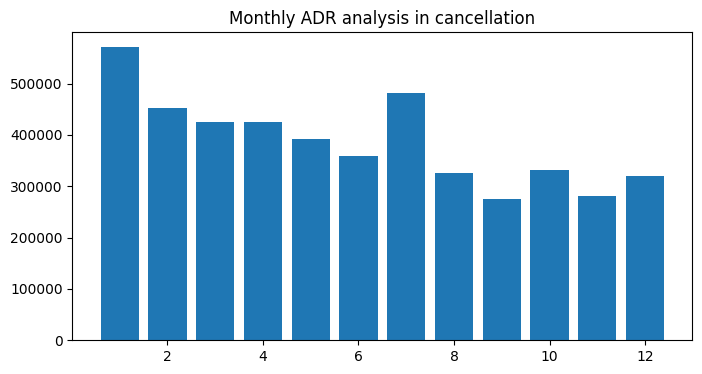

In [135]:
plt.figure(figsize=(8,4))
plt.title("Monthly ADR analysis in cancellation")
plt.bar(data['month'], data['adr'])
plt.show();

In [136]:
data=resort_hotel[resort_hotel['is_canceled']==1].groupby('month')[['adr']].sum().reset_index()
data

,month,adr
0,1,105827.43
1,2,97872.00
2,3,121888.20
3,4,116133.02
4,5,113183.58
5,6,151712.08
6,7,157789.36
7,8,108809.54
8,9,47716.99
9,10,52823.07


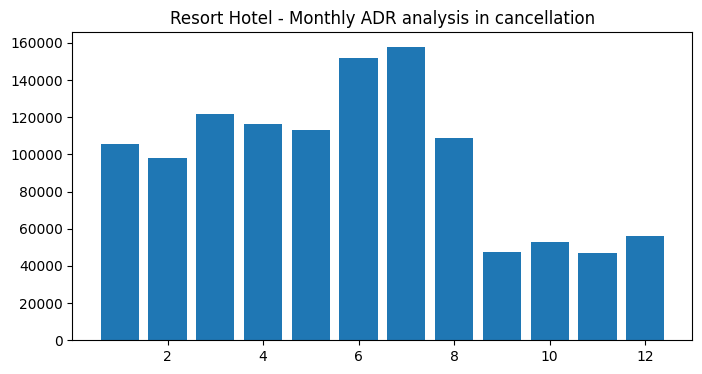

In [137]:
plt.figure(figsize=(8,4))
plt.title("Resort Hotel - Monthly ADR analysis in cancellation")
plt.bar(data['month'], data['adr'])
plt.show();

In [138]:
data=city_hotel[city_hotel['is_canceled']==1].groupby('month')[['adr']].sum().reset_index()
data

,month,adr
0,1,465433.74
1,2,355443.76
2,3,303097.16
3,4,309280.21
4,5,278254.50
5,6,207976.81
6,7,324641.26
7,8,216977.39
8,9,227811.34
9,10,278333.80


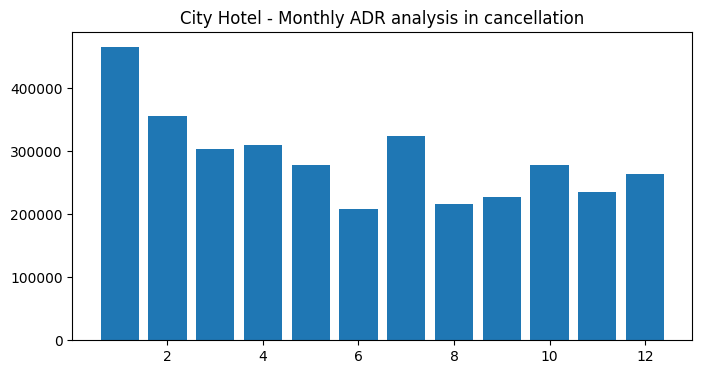

In [139]:
plt.figure(figsize=(8,4))
plt.title("City Hotel - Monthly ADR analysis in cancellation")
plt.bar(data['month'], data['adr'])
plt.show()

In [140]:
data=df.groupby('month')[['days_in_waiting_list']].sum().reset_index()
data

,month,days_in_waiting_list
0,1,51849
1,2,13171
2,3,11476
3,4,13073
4,5,22843
5,6,8880
6,7,6376
7,8,9207
8,9,47823
9,10,44080


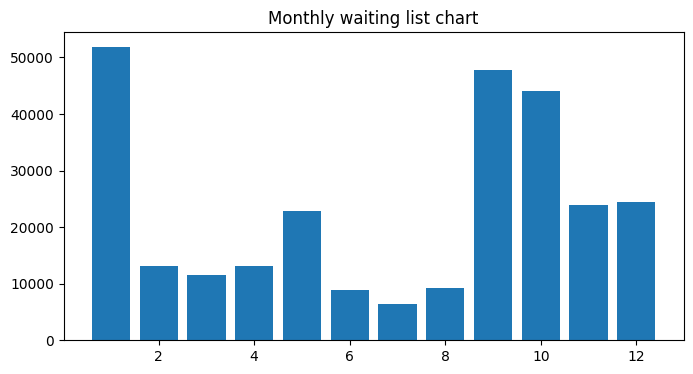

In [141]:
plt.figure(figsize=(8,4))
plt.title("Monthly waiting list chart")
plt.bar(data['month'], data['days_in_waiting_list'])
plt.show();

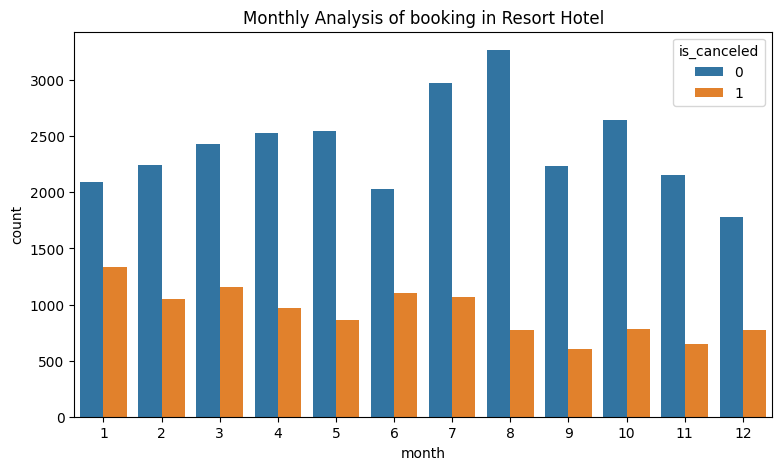

In [142]:
plt.figure(figsize=(9,5))
plt.title("Monthly Analysis of booking in Resort Hotel")
axl=sns.countplot(x='month', hue='is_canceled', data=resort_hotel)
plt.show()

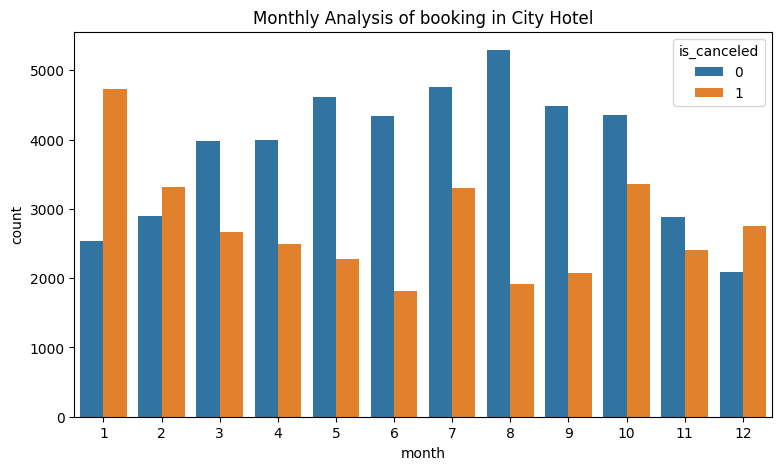

In [143]:
plt.figure(figsize=(9,5))
plt.title("Monthly Analysis of booking in City Hotel")
axl=sns.countplot(x='month', hue='is_canceled', data=city_hotel)
plt.show()

In [144]:
data=resort_hotel.groupby('month')[['days_in_waiting_list']].sum().reset_index()
data

,month,days_in_waiting_list
0,1,6838
1,2,647
2,3,1455
3,4,1026
4,5,532
5,6,1500
6,7,12
7,8,0
8,9,101
9,10,6763


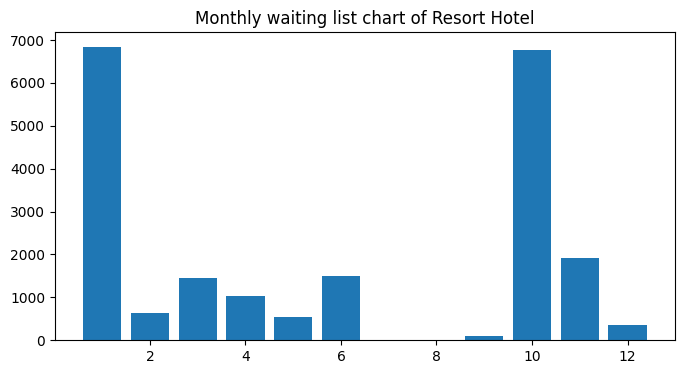

In [145]:
plt.figure(figsize=(8,4))
plt.title("Monthly waiting list chart of Resort Hotel")
plt.bar(data['month'], data['days_in_waiting_list'])
plt.show();

In [146]:
data=city_hotel.groupby('month')[['days_in_waiting_list']].sum().reset_index()
data

,month,days_in_waiting_list
0,1,45011
1,2,12524
2,3,10021
3,4,12047
4,5,22311
5,6,7380
6,7,6364
7,8,9207
8,9,47722
9,10,37317


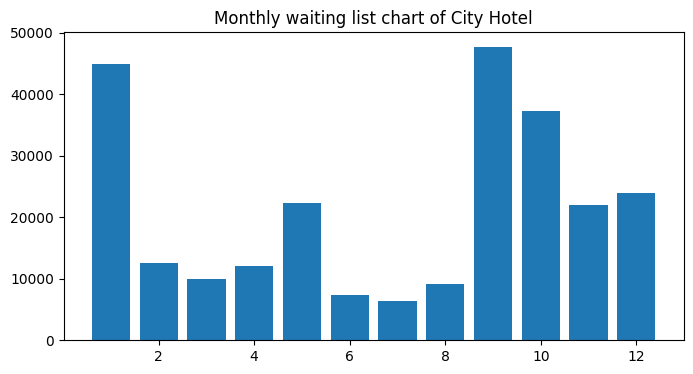

In [147]:
plt.figure(figsize=(8,4))
plt.title("Monthly waiting list chart of City Hotel")
plt.bar(data['month'], data['days_in_waiting_list'])
plt.show();

In [148]:
data=df['country'].value_counts(normalize=True)[:10]
data

country
PRT    0.408656
GBR    0.102008
FRA    0.087593
ESP    0.072059
DEU    0.061286
ITA    0.031673
IRL    0.028385
BEL    0.019697
BRA    0.018704
NLD    0.017695
Name: proportion, dtype: float64

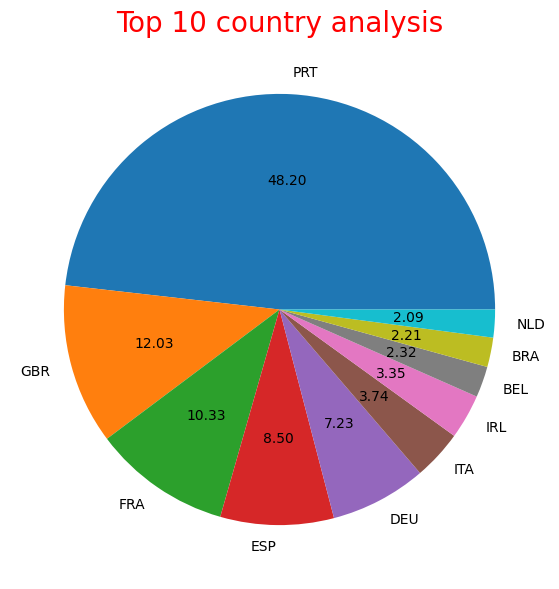

In [149]:
plt.figure(figsize=(8,7))
plt.title("Top 10 country analysis", fontsize=20, color='red')
plt.pie(data, autopct='%.2f', labels=data.index)
plt.show();

In [150]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'month'],
      dtype='object')

In [151]:
data=df['distribution_channel'].value_counts().reset_index()
data = data[data['count']>5]
data

,distribution_channel,count
0,TA/TO,97870
1,Direct,14645
2,Corporate,6677
3,GDS,193


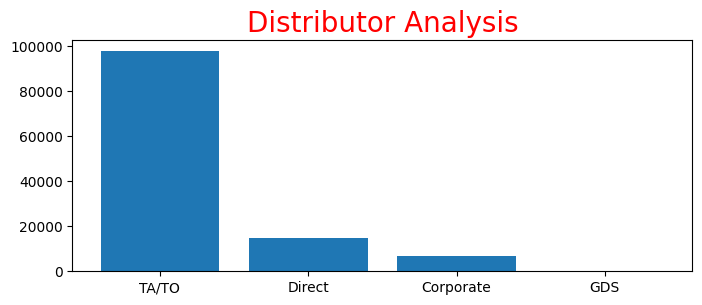

In [152]:
plt.figure(figsize=(8,3))
plt.title("Distributor Analysis", fontsize=20, color='red')
plt.bar(data['distribution_channel'], data['count'])
plt.show();

# Conclusion

Based on various visualizations we have analyzed, it can be concluded that:
1. ADR of city hotel is more than resort hotel leading to more cancellation in City Hotel.
2. Monthly analysis of overall dataset and both the hotels explicitly proves that the cancelltion is high in the months where   the ADR is high, i.e, January.
3. Waiting list analysis also supports the 2nd statement that in the months where waiting list is high, the more is the cancellation is.
4. Distribution is heavily dependent on thr Online Market and fraud branding on the online platforms might lead to a sense of distrust among the customers so more cancellation happened.

# THANK YOU
